# Lesson 4 — Perceptron & Generalized Linear Models  

## Important context (read this first)
This lesson **depends heavily on Lesson 3**.

- Logistic Regression is a **specific GLM**
- Newton's Method (from Lesson 3) reappears conceptually
- The Perceptron is the historical bridge to neural networks



## Imports

In [43]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

## 1. Perceptron Algorithm
The perceptron aims to find a linear decision boundary separating two classes
### Hypothesis
$$
h(x) = \text{sign}(\theta^T x)
$$
### Update rule
If:
$$
y^{(i)} (\theta^T x^{(i)}) \le 0
$$
then update:
$$
\theta := \theta + y^{(i)} x^{(i)}
$$



Works **only** for linearly separable data.


In [44]:
def perceptron_train(Xb, y, epochs=20):
    theta = np.zeros((Xb.shape[1], 1))
    history = []
    for _ in range(epochs):
        mistakes = 0
        for i in range(Xb.shape[0]):
            xi = Xb[i:i+1, :]
            yi = y[i]
            if yi * (xi @ theta) <= 0:
                theta += yi * xi.T
                mistakes += 1
        history.append(mistakes)
    return theta, history

### Perceptron on Linearly Separable Data

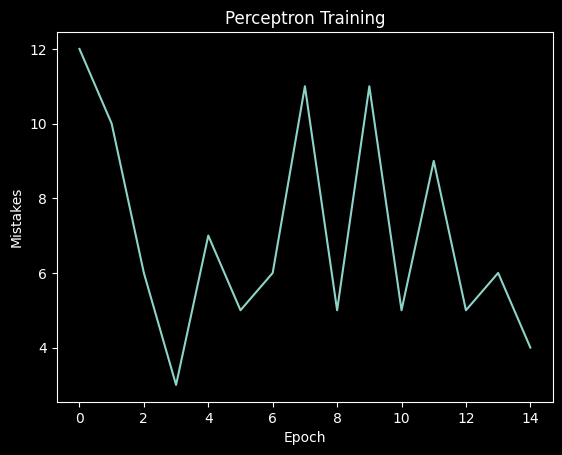

In [45]:
n = 200
X = np.random.randn(n, 2)
y = np.where(X[:,0] + X[:,1] > 0, 1, -1).reshape(-1,1)

X = (X - X.mean(axis=0)) / X.std(axis=0)
Xb = np.c_[np.ones((n,1)), X]

theta_p, mistakes = perceptron_train(Xb, y, epochs=15)

plt.plot(mistakes)
plt.xlabel("Epoch")
plt.ylabel("Mistakes")
plt.title("Perceptron Training")
plt.show()

## 2. Limits of the Perceptron
- No probabilities
- No loss minimization
- No convergence on non-separable data


## 3. Exponential Family of Distributions

A distribution belongs to the exponential family if:

$$
p(y \mid \eta) = b(y)\exp(\eta^T T(y) - a(\eta))
$$

Examples:
- Gaussian → Linear Regression
- Bernoulli → Logistic Regression
- Multinomial → Softmax Regression


## 4. Generalized Linear Models (GLMs)

A GLM consists of:

1. Random component
   $y \sim \text{ExponentialFamily}(\eta)$

2. Systematic component
   $\eta = \theta^T x$

3. Link function
   $g(\mathbb{E}[y \mid x]) = \theta^T x$


## 5. Softmax Regression (Multi-class)

$$
P(y = k \mid x) =
\frac{e^{\theta_k^T x}}{\sum_j e^{\theta_j^T x}}
$$

Softmax is the multi-class extension of logistic regression.


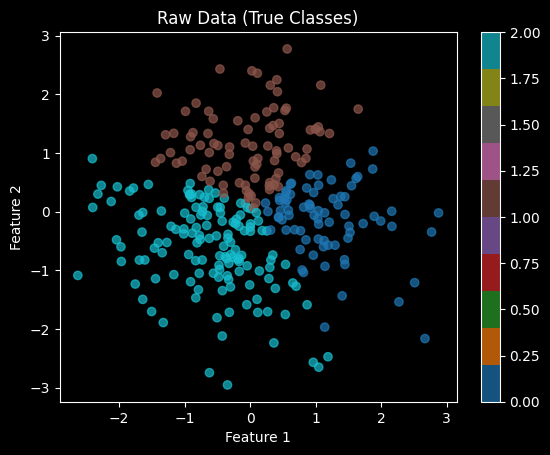

In [46]:
m = 300
X = np.random.randn(m, 2)
labels = np.argmax(
    np.c_[X[:,0], X[:,1], -(X[:,0] + X[:,1])],
    axis=1 )

K = 3
y_onehot = np.eye(K)[labels]

X = (X - X.mean(axis=0)) / X.std(axis=0)
Xb = np.c_[np.ones((m,1)), X]

plt.scatter(X[:,0], X[:,1], c=labels, cmap="tab10", alpha=0.7)
plt.title("Raw Data (True Classes)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar()
plt.show()


In [47]:
def softmax(Z):
    Z = Z - np.max(Z, axis=1, keepdims=True)
    expZ = np.exp(Z)
    return expZ / np.sum(expZ, axis=1, keepdims=True)

def softmax_grad(Xb, y_onehot, Theta):
    m = Xb.shape[0]
    probs = softmax(Xb @ Theta)
    return (1 / m) * Xb.T @ (probs - y_onehot)


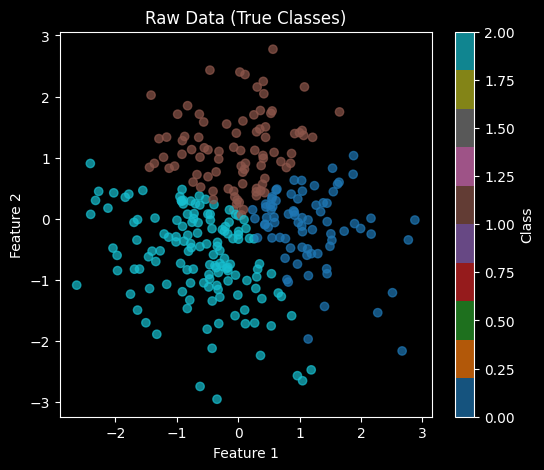

In [50]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=labels, cmap="tab10", alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Raw Data (True Classes)")
plt.colorbar(label="Class")
plt.show()




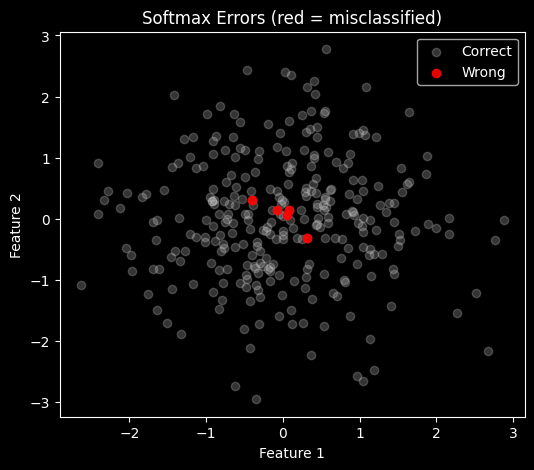

In [51]:
wrong = preds != labels

print("num wrong:", np.sum(wrong))

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c="lightgray", alpha=0.25, label="Correct")
plt.scatter(X[wrong,0], X[wrong,1], c="red", alpha=0.9, label="Wrong")
plt.title("Softmax Errors (red = misclassified)")
plt.xlabel("Feature 1"); plt.ylabel("Feature 2")
plt.legend()
plt.show()

## Key Takeaways
- Perceptron is historical, not practical
- GLMs unify regression and classification
- Logistic and softmax emerge naturally from probability
